In [1]:
data = read.csv("../../Data/petrol_consumption.csv")

In [2]:
print(head(data))
print(is.data.frame(data))
print(paste("cols:", ncol(data)))
print(paste("rows:", nrow(data)))

  Petrol_tax Average_income Paved_Highways Population_Driver_licence...
1        9.0           3571           1976                        0.525
2        9.0           4092           1250                        0.572
3        9.0           3865           1586                        0.580
4        7.5           4870           2351                        0.529
5        8.0           4399            431                        0.544
6       10.0           5342           1333                        0.571
  Petrol_Consumption
1                541
2                524
3                561
4                414
5                410
6                457
[1] TRUE
[1] "cols: 5"
[1] "rows: 48"


In [3]:
summary(data)

   Petrol_tax     Average_income Paved_Highways  Population_Driver_licence...
 Min.   : 5.000   Min.   :3063   Min.   :  431   Min.   :0.4510              
 1st Qu.: 7.000   1st Qu.:3739   1st Qu.: 3110   1st Qu.:0.5298              
 Median : 7.500   Median :4298   Median : 4736   Median :0.5645              
 Mean   : 7.668   Mean   :4242   Mean   : 5565   Mean   :0.5703              
 3rd Qu.: 8.125   3rd Qu.:4579   3rd Qu.: 7156   3rd Qu.:0.5952              
 Max.   :10.000   Max.   :5342   Max.   :17782   Max.   :0.7240              
 Petrol_Consumption
 Min.   :344.0     
 1st Qu.:509.5     
 Median :568.5     
 Mean   :576.8     
 3rd Qu.:632.8     
 Max.   :968.0     

In [4]:
str(data)

'data.frame':	48 obs. of  5 variables:
 $ Petrol_tax                  : num  9 9 9 7.5 8 10 8 8 8 7 ...
 $ Average_income              : int  3571 4092 3865 4870 4399 5342 5319 5126 4447 4512 ...
 $ Paved_Highways              : int  1976 1250 1586 2351 431 1333 11868 2138 8577 8507 ...
 $ Population_Driver_licence...: num  0.525 0.572 0.58 0.529 0.544 0.571 0.451 0.553 0.529 0.552 ...
 $ Petrol_Consumption          : int  541 524 561 414 410 457 344 467 464 498 ...


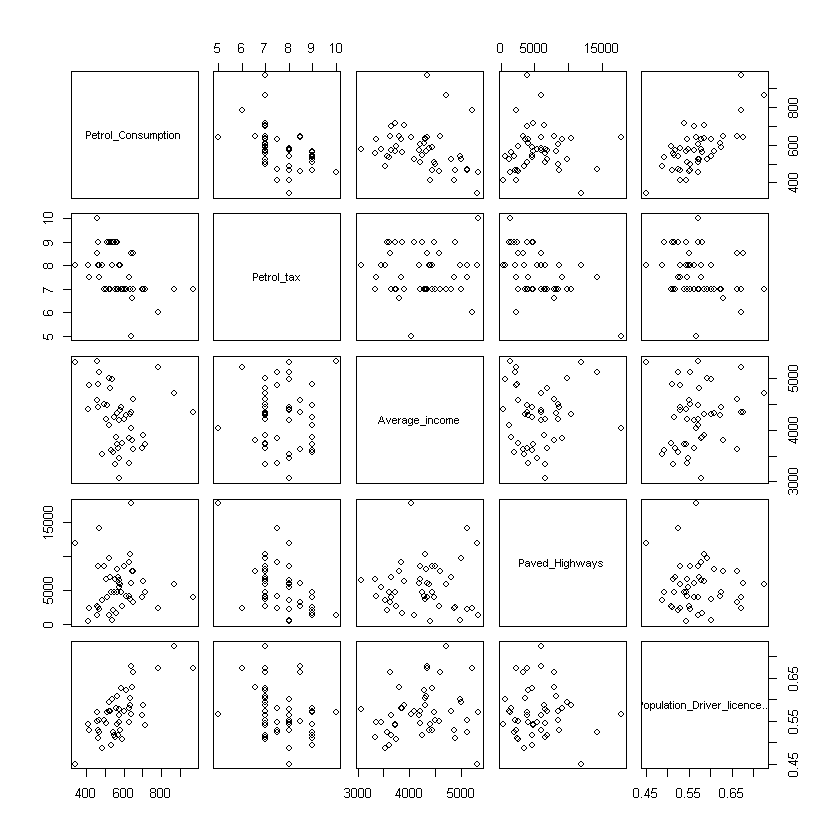

In [5]:
# Visualization
pairs(~Petrol_Consumption+Petrol_tax+Average_income+Paved_Highways+Population_Driver_licence..., data = data)

In [6]:
input = data[, c("Petrol_tax", "Population_Driver_licence...", "Petrol_Consumption")]
head(input)

,Petrol_tax,Population_Driver_licence...,Petrol_Consumption
,<dbl>,<dbl>,<int>
1,9.0,0.525,541
2,9.0,0.572,524
3,9.0,0.580,561
4,7.5,0.529,414
5,8.0,0.544,410
6,10.0,0.571,457


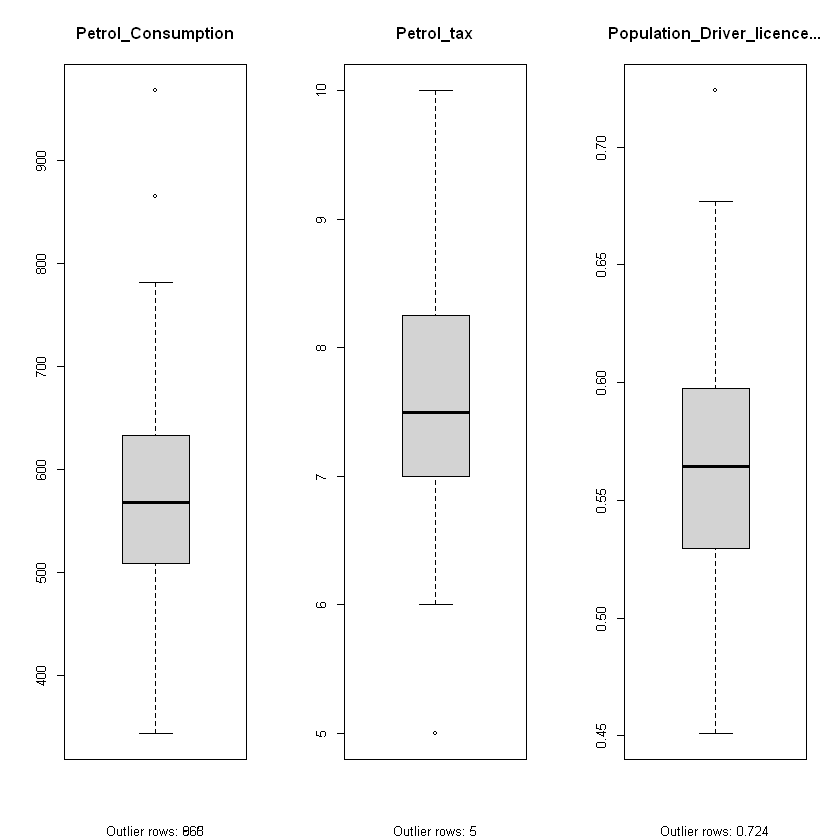

In [7]:
par(mfrow = c(1, 3))
boxplot(input$Petrol_Consumption, main = "Petrol_Consumption", 
        sub = paste("Outlier rows:", boxplot.stats(input$Petrol_Consumption)$out))
boxplot(input$Petrol_tax, main = "Petrol_tax", 
        sub = paste("Outlier rows:", boxplot.stats(input$Petrol_tax)$out))
boxplot(input$Population_Driver_licence..., main = "Population_Driver_licence...", 
        sub = paste("Outlier rows:", boxplot.stats(input$Population_Driver_licence...)$out))

In [8]:
pc_outliers = boxplot.stats(input$Petrol_Consumption)$out
print("pc_outliers:")
print(pc_outliers)

pt_outliers = boxplot.stats(input$Petrol_tax)$out
print("pt_outliers:")
print(pt_outliers)

pd_outliers = boxplot.stats(input$Population_Driver_licence...)$out
print("pd_outliers:")
print(pd_outliers)

[1] "pc_outliers:"
[1] 865 968
[1] "pt_outliers:"
[1] 5
[1] "pd_outliers:"
[1] 0.724


In [9]:
# Drop rows have outliers
print(paste("Before drop:", nrow(input)))
for (record in pc_outliers){
    input = input[input$Petrol_Consumption != record, ]
}
for (record in pt_outliers){
    input = input[input$Petrol_tax != record, ]
}
for (record in pd_outliers){
    input = input[input$Population_Driver_licence... != record, ]
}
print(paste("After drop:", nrow(input)))

[1] "Before drop: 48"
[1] "After drop: 45"


In [10]:
print("Correlations pc vs pt and pdl")
print(cor(input$Petrol_Consumption, input$Petrol_tax))
print(cor(input$Petrol_Consumption, input$Population_Driver_licence...))

[1] "Correlations pc vs pt and pdl"
[1] -0.4629515
[1] 0.6052256


In [11]:
# Create training and test data samples from orginal data
set.seed(42) # Setting seed to reproduce results of ramdom sampling
trainingRowIndex = sample(1: nrow(input), 0.8 * nrow(input))
print("Selected training row indexes:")
print(trainingRowIndex)
trainingData = input[trainingRowIndex, ] # training data
testData = input[- trainingRowIndex,] # testing data
print("Rows of training data and test data:")
print(nrow(trainingData))
print(nrow(testData))

[1] "Selected training row indexes:"
 [1] 37  1 25 10 36 18 24  7 41 43 20 26  3  9 45 27  4  5 13 28 35  2  8 33 44
[26] 42 11 15 23 29 16  6 39 12 34 40
[1] "Rows of training data and test data:"
[1] 36
[1] 9


In [12]:
# Develop the model on the training data and use it to preidict the Length on test data
lmMod = lm(Petrol_Consumption~Petrol_tax+Population_Driver_licence..., data =  trainingData) # Build the model
iPred = predict(lmMod, testData) # predict length

# mean square error according to model
mse = mean(lmMod$residuals^2)
print(paste("mse:", mse))

# mean square error of test data
mse_test = mean((testData$Petrol_Consumption - iPred)^2)
print(paste("mse in test:", mse_test))

[1] "mse: 4739.38834330754"
[1] "mse in test: 1247.25293774595"


In [13]:
# Review dianostic measures
print(summary(lmMod))


Call:
lm(formula = Petrol_Consumption ~ Petrol_tax + Population_Driver_licence..., 
    data = trainingData)

Residuals:
    Min      1Q  Median      3Q     Max 
-125.16  -61.70    7.70   58.74  151.40 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)   
(Intercept)                    256.26     221.90   1.155  0.25647   
Petrol_tax                     -31.34      14.47  -2.166  0.03762 * 
Population_Driver_licence...   973.59     270.33   3.602  0.00103 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 71.9 on 33 degrees of freedom
Multiple R-squared:  0.457,	Adjusted R-squared:  0.4241 
F-statistic: 13.89 on 2 and 33 DF,  p-value: 4.205e-05



### => r^2 has low value, this model fits ~ 45% data, not good

In [14]:
# Model coefficients
print(coef(lmMod))
b = coef(lmMod)[1]
mph = coef(lmMod)[2]
mpd = coef(lmMod)[3]

                 (Intercept)                   Petrol_tax 
                   256.25506                    -31.34155 
Population_Driver_licence... 
                   973.59063 


In [15]:
# new predictions
# pt = 9, pd = 0.58
x1 = 9
x2 = 0.58
# solution 1
y = (mph * x1 + mpd * x2 + b)
print("Solution 1 - results:")
print(y)

# solution 2
y1 = predict(lmMod, data.frame(Petrol_tax = x1, Population_Driver_licence... = x2))
print("Solution 2 - results:")
print(y1)

[1] "Solution 1 - results:"
Petrol_tax 
  538.8637 
[1] "Solution 2 - results:"
       1 
538.8637 


# MBA

In [16]:
library("BMA")
library("relaimpo")

Loading required package: survival

Loading required package: leaps

Loading required package: robustbase


Attaching package: 'robustbase'


The following object is masked from 'package:survival':

    heart


Loading required package: inline

Loading required package: rrcov

Scalable Robust Estimators with High Breakdown Point (version 1.5-5)


Loading required package: MASS

Loading required package: boot


Attaching package: 'boot'


The following object is masked from 'package:robustbase':

    salinity


The following object is masked from 'package:survival':

    aml


Loading required package: survey

Loading required package: grid

Loading required package: Matrix


Attaching package: 'survey'


The following object is masked from 'package:graphics':

    dotchart


Loading required package: mitools

This is the global version of package relaimpo.


If you are a non-US user, a version with the interesting additional metric pmvd is available


from Ulrike Groempings web site at

In [17]:
yvar = data[, ("Petrol_Consumption")]
xvars = data[, c(-5)]
bma = bicreg(xvars, yvar, strict = F, OR = 2)

In [18]:
summary(bma)


Call:
bicreg(x = xvars, y = yvar, strict = F, OR = 2)


  1  models were selected
 Best  1  models (cumulative posterior probability =  1 ): 

                              p!=0   EV         SD         model 1   
Intercept                     100    307.32790  156.83067   307.32790
Petrol_tax                    100    -29.48381   10.58358   -29.48381
Average_income                100     -0.06802    0.01701    -0.06802
Paved_Highways                  0      0.00000    0.00000       .    
Population_Driver_licence...  100   1374.76841  183.66954  1374.76841
                                                                     
nVar                                                            3    
r2                                                            0.675  
BIC                                                         -42.31437
post prob                                                     1      


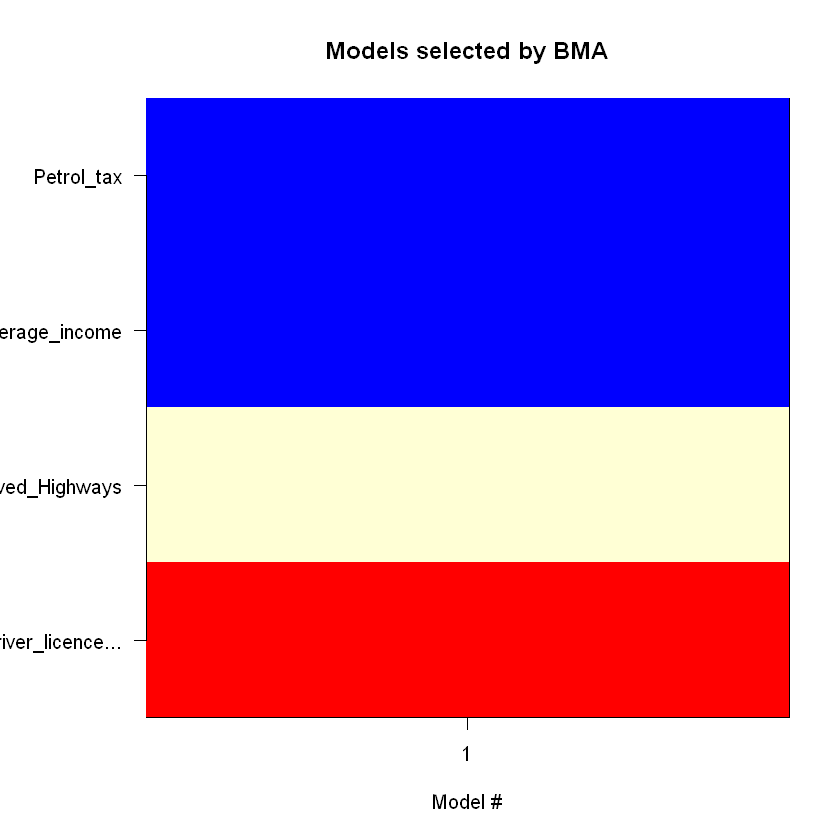

In [19]:
imageplot.bma(bma)

### Select model with: Petrol_tax, Average_income, Population_Driver_licence...

In [20]:
m = lm(Petrol_Consumption~Petrol_tax+Average_income+Population_Driver_licence..., data = data)

In [21]:
calc.relimp(m, type = "lmg", rela = T, rank = T)

Response variable: Petrol_Consumption 
Total response variance: 12518.44 
Analysis based on 48 observations 

3 Regressors: 
Petrol_tax Average_income Population_Driver_licence... 
Proportion of variance explained by model: 67.49%
Metrics are normalized to sum to 100% (rela=TRUE). 

Relative importance metrics: 

                                   lmg
Petrol_tax                   0.1953570
Average_income               0.1339606
Population_Driver_licence... 0.6706823

Average coefficients for different model sizes: 

                                        1X           2Xs           3Xs
Petrol_tax                    -53.10629788  -42.41256600  -29.48380857
Average_income                 -0.04776056   -0.05878876   -0.06802286
Population_Driver_licence... 1409.84211133 1388.26447384 1374.76841106